In [ ]:
pip install wordcloud

In [148]:
# import modules
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud

# I. Nettoyage du dataframe

In [216]:
movies_df = pd.read_pickle("./data/movies_tmdb.pkl")

##### On supprime les lignes contenant des 0 pour le budget ou la recette :

In [218]:
movies_df = movies_df.query('budget > 0 and revenue > 0')
print(movies_df.shape)
movies_df.head(2)

(4974, 25)


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/Yc9q6QuWrMp9nuDm5R8ExNqbEq.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,en,Avatar,...,2009-12-15,2920357254,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.543,27045
3,False,/tuDhEdza074bA497bO9WFEPs6O6.jpg,"{'id': 420, 'name': 'The Chronicles of Narnia ...",180000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",,411,tt0363771,en,"The Chronicles of Narnia: The Lion, the Witch ...",...,2005-12-07,745013115,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Has Reigned For 100 Years...,"The Chronicles of Narnia: The Lion, the Witch ...",False,7.102,8982


##### Sur 10 000 films, il ne nous en reste plus que 4974.

##### On retire les colonnes inutiles :

In [219]:
movies_df=movies_df.drop(columns =['adult','backdrop_path', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 
                                  'original_title','overview','poster_path', 'status', 'video'])

##### Après avoir supprimé les colonnes dont nous n’avions pas besoin, nous nettoyons certaines variables, telles que le genre présenté sous forme de listes pas faciles à manipuler (exemple : [{‘id’: 80, ‘name’: ‘Crime’}, {‘id’: 35, ‘name’ :’Adventure’}]...) :

In [220]:
def cleaning_variable(cell):
    if isinstance(cell, list):
        variable = []
        for element in cell:
            variable.append(element["name"])
    return variable

#Replace empty list by nan.
def replace_empty_lists(x):
    if isinstance(x,list) and not x :
        return np.nan
    return x

#List of columns to which apply the function
colnames = ['genres','production_countries','production_companies']

#Apply the functions
for colname in colnames:
    try:
        movies_df[colname] = movies_df[colname].apply(cleaning_variable)
    except:
        pass
    try:
        movies_df[colname] = movies_df[colname].apply(replace_empty_lists)
    except:
        pass
    
movies_df.head(2)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,3086.550,"[20th Century Fox, Ingenious Media, Dune Enter...","[United States of America, United Kingdom]",2009-12-15,2920357254,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Enter the world of Pandora.,Avatar,7.543,27045
3,180000000,"[Adventure, Family, Fantasy]",en,539.113,"[Walt Disney Pictures, Walden Media, C.S. Lewi...","[United Kingdom, United States of America]",2005-12-07,745013115,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Evil Has Reigned For 100 Years...,"The Chronicles of Narnia: The Lion, the Witch ...",7.102,8982


##### On conserve uniquement le nom du premier genre (les genres sont affichés par ordre d’importance), ou du pays de production :

In [221]:
#Sélectionner que le premier élément
def select_first_element(x):
    if isinstance(x,list):
        return x[0]
    
for colname in colnames:
    movies_df[colname] = movies_df[colname].apply(select_first_element)
    
movies_df[colnames]

,genres,production_countries,production_companies
0,Action,United States of America,20th Century Fox
3,Adventure,United Kingdom,Walt Disney Pictures
4,Family,Germany,Imagine Entertainment
6,Action,United States of America,DreamWorks Animation
7,Adventure,United Kingdom,Warner Bros. Pictures
...,...,...,...
9964,Crime,Canada,Universal Pictures
9973,Action,United States of America,Andrew Stevens Entertainment
9984,Horror,Canada,Warner Bros. Pictures
9988,Adventure,United States of America,American Filmworks


In [222]:
movies_df.head(2)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,237000000,Action,en,3086.550,20th Century Fox,United States of America,2009-12-15,2920357254,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Enter the world of Pandora.,Avatar,7.543,27045
3,180000000,Adventure,en,539.113,Walt Disney Pictures,United Kingdom,2005-12-07,745013115,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Evil Has Reigned For 100 Years...,"The Chronicles of Narnia: The Lion, the Witch ...",7.102,8982


#### Le dictionnaire de variables est le suivant : 
##### budget : budget du film
##### genres : genre du film
##### original_language : langue originale du film
##### popularity : popularité du film, note se basant sur de nombreux critères du site Tmdb
##### production_companies : compagnie de production du film
##### production_countries : pays du film
##### release_date : date de sortie
##### revenue : recette du film
##### runtime : durée du film
##### spoken_languages : langues parlées dans le film
##### tagline : bref résumé du film
##### title : titre
##### vote_average : note moyenne du film sur Tmdb
##### vote_count : nombre de personnes ayant noté ce film sur Tmdb


# II. Visualisation et statistiques descriptives

### 1. Liens entre les variables quantitatives

#### On s'intéresse ici aux caractéristiques quantitatives des films : recette, budget, durée, popularity, note moyenne, nombre de notes. On cherche à voir en quoi celles-ci influencent la recette du film.

##### Statistiques descriptives univariées des variables quantitatives :

In [20]:
movies_df_quanti = movies_df[['revenue','budget','runtime','popularity','vote_average','vote_count']]
movies_df_quanti.describe()

,revenue,budget,runtime,popularity,vote_average,vote_count
count,4.974000e+03,4.974000e+03,4974.000000,4974.000000,4974.000000,4974.000000
mean,9.319040e+07,3.194401e+07,109.555086,23.981217,6.532609,2132.472256
std,1.623132e+08,3.864073e+07,20.720990,51.778598,0.806128,3213.418697
min,1.000000e+00,5.000000e+00,5.000000,5.918000,1.800000,2.000000
25%,1.153029e+07,7.000000e+06,95.000000,13.134250,6.017000,405.000000
50%,3.768506e+07,1.980000e+07,105.000000,17.798500,6.547500,975.000000
75%,1.039066e+08,4.000000e+07,120.000000,26.363250,7.100000,2417.250000
max,2.920357e+09,3.800000e+08,254.000000,3424.983000,8.716000,32780.000000


##### Pairplot des variables quantitatives :

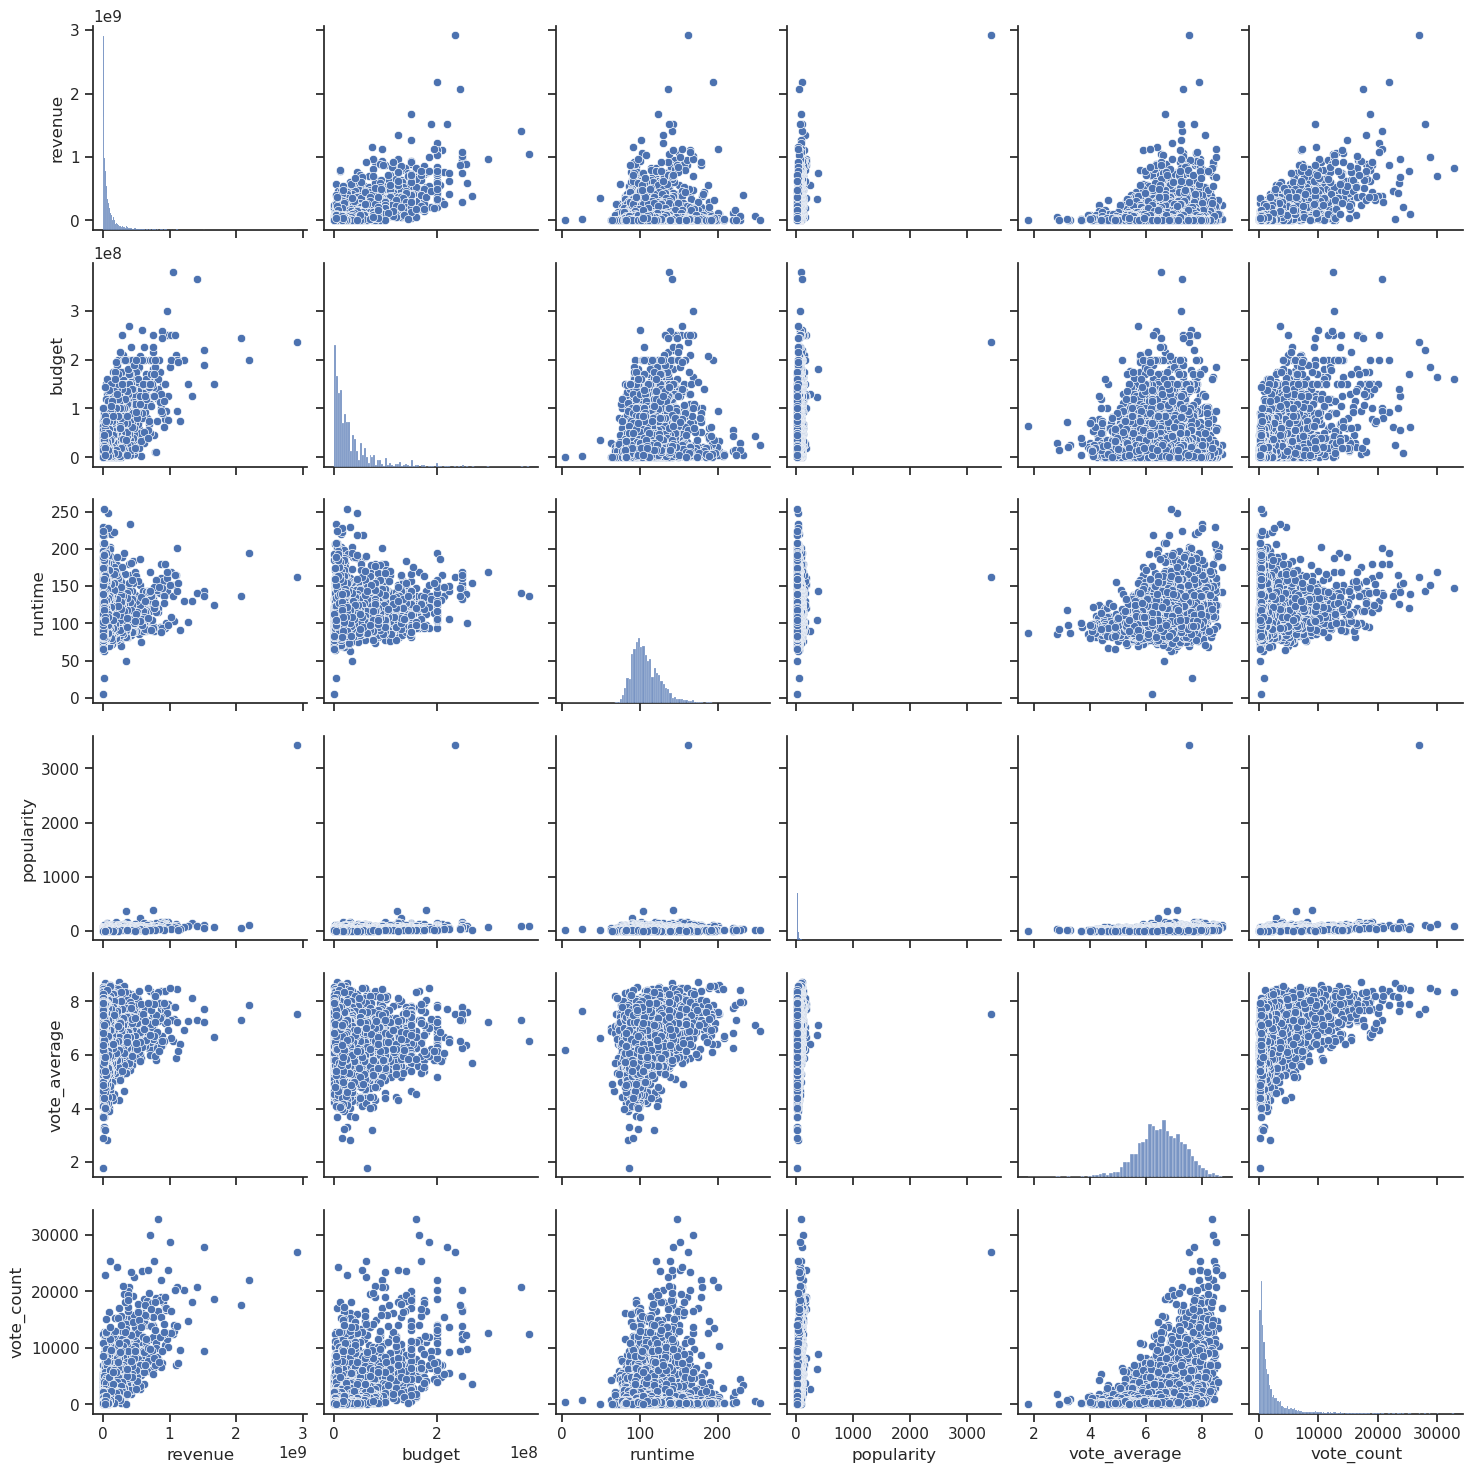

In [21]:
# Liens entre les variables quantitatives
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_df_quanti)
plt.show()

##### Ce graphique nous montre le lien entre chacune des 6 variables étudiées. Les graphiques les plus intéressants semblent être la recette en fonction du budget, ainsi que la recette en fonction du nombre de notes. 
##### On peut vérifier cette idée à l'aide d'une matrice de corrélation :

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des films\n')

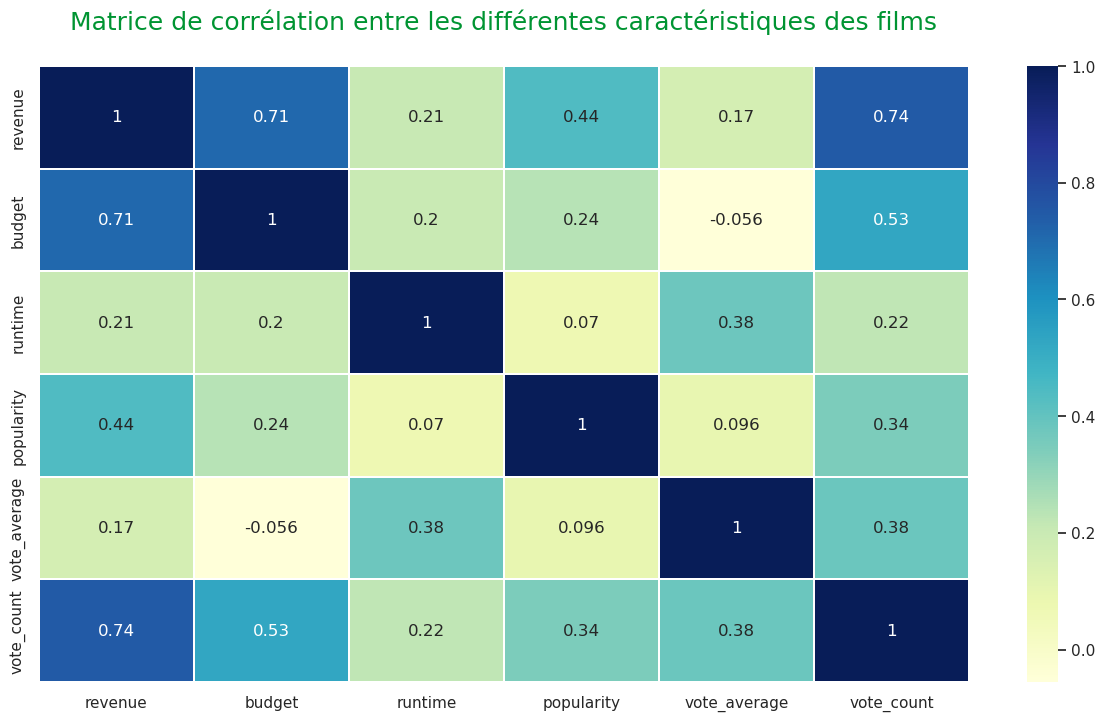

In [186]:
sns.heatmap(movies_df_quanti.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);
plt.title("Matrice de corrélation entre les différentes caractéristiques des films\n", fontsize=18, color='#009432')

##### Le plus gros coefficient correspond à la corrélation entre la recette et le budget. Cela nous laisse penser que plus le budget est élevé, plus la recette le sera également. Le budget apparait ainsi comme la variable la plus intéressante dans notre prédiction.
##### Encore une fois, on voit également une corrélation entre le nombre de notes et la recette. Plus des personnes notent un film, plus celui-ci a une recette élevée. Evidemment, la causalité est difficile à établir. On peut penser que le nombre de notes est un indicateur du nombre de personnes qui ont vu le film. Plus il y a eu de spectateurs, plus le film a une recette importante, ce qui parait logique. 

##### Focalisons-nous sur la relation entre la recette et le budget :

Text(0.5, 1.0, 'Recette en fonction du budget')

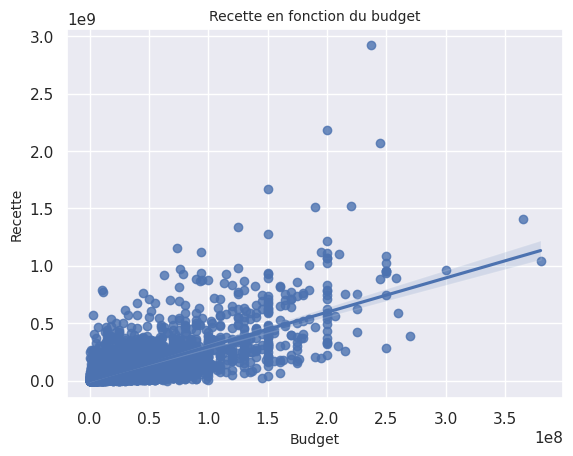

In [51]:
sns.regplot(data = movies_df, x = movies_df['budget'], y=movies_df['revenue'])
plt.xlabel("Budget", fontsize=10)  
plt.ylabel("Recette", fontsize=10)
plt.title("Recette en fonction du budget", fontsize=10)


##### Distributions de la recette et du budget :

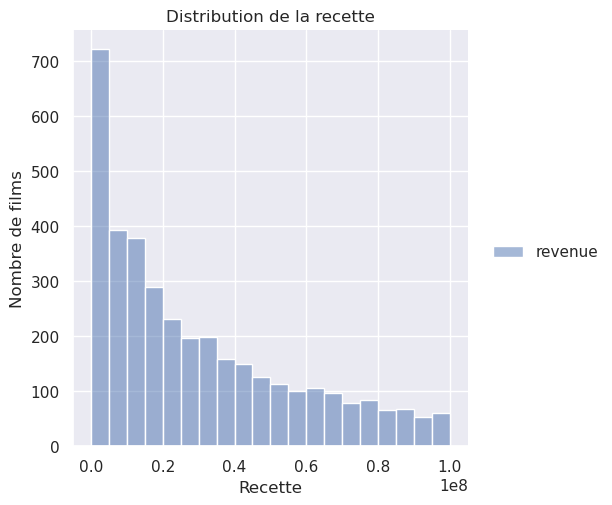

In [182]:
#On s'arrête au 3ème quartile pour que le graphique soit lisible
sns.displot(movies_df[['revenue']][movies_df.revenue < 1e8])
plt.title('Distribution de la recette')
plt.xlabel('Recette')
plt.ylabel('Nombre de films')
plt.show()

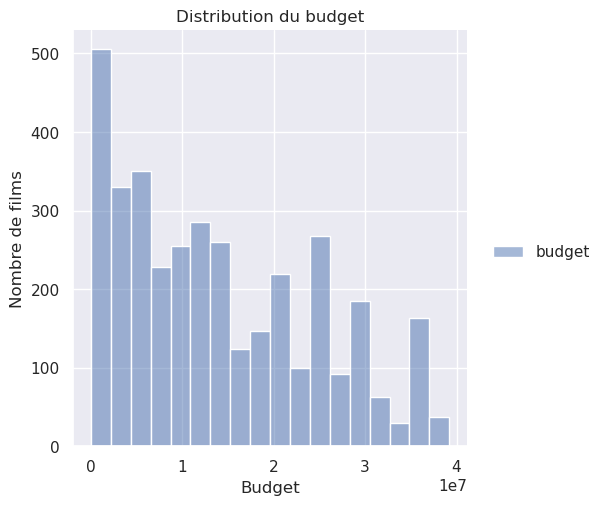

In [ ]:
#On s'arrête au 3ème quartile pour que le graphique soit lisible
sns.displot(movies_df[['budget']][movies_df.budget < 4e7])
plt.title('Distribution du budget')
plt.xlabel('Budget')
plt.ylabel('Nombre de films')
plt.show()

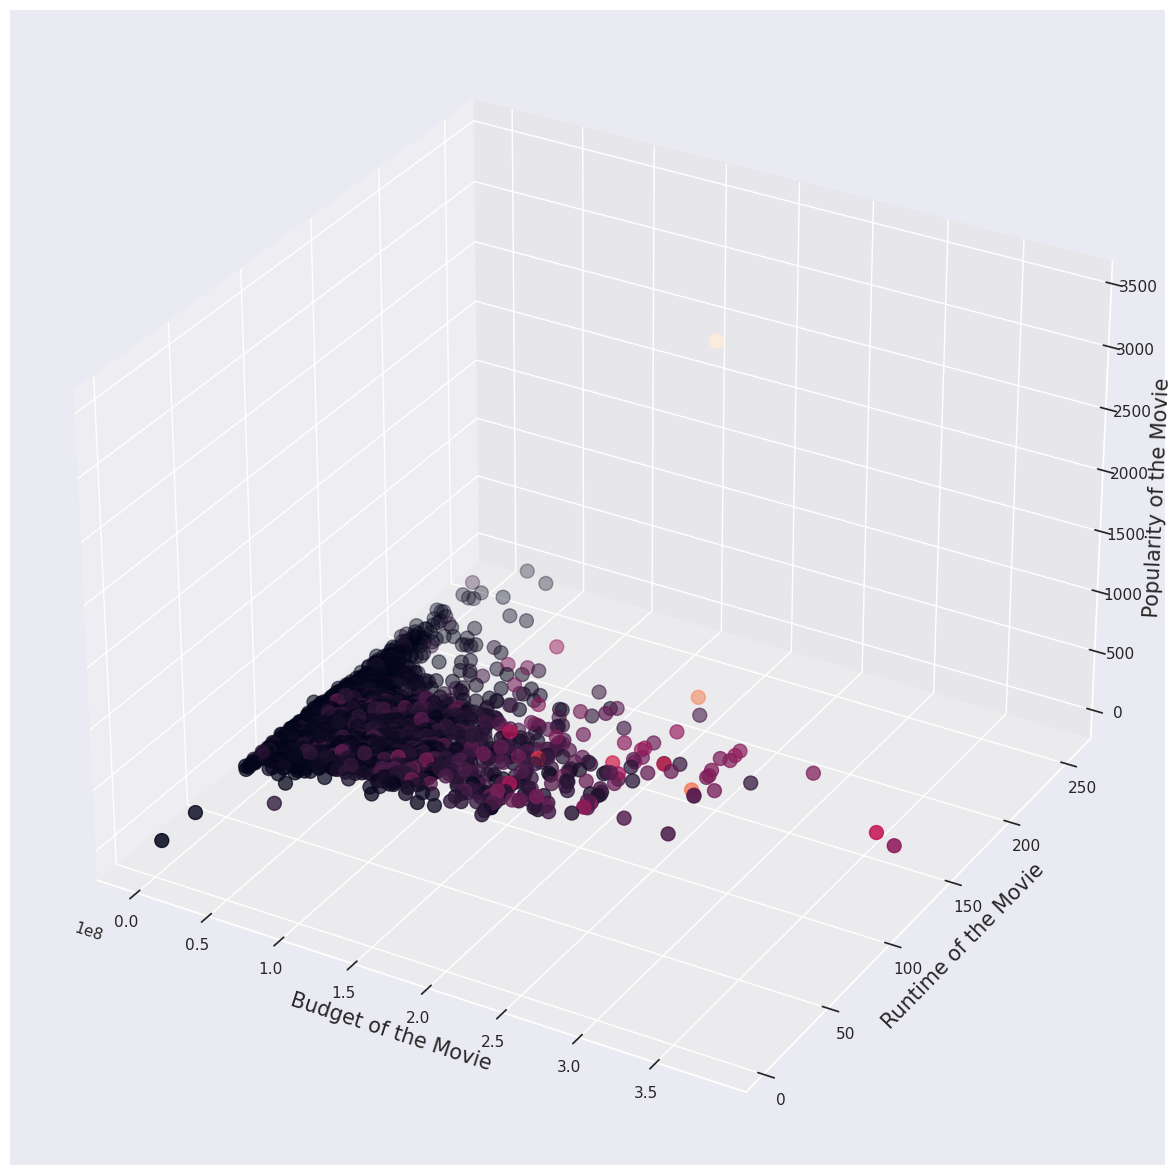

In [68]:
#Le graphique en 3 dimensions, j'ai pas compris, c = df ??

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111,projection = '3d')
ax.scatter(movies_df['budget'],movies_df['runtime'],movies_df['popularity'], c = movies_df['revenue'], marker = 'o', s = 100)
ax.set_xlabel('Budget of the Movie',fontsize=15)
ax.set_ylabel('Runtime of the Movie',fontsize=15)
ax.set_zlabel('Popularity of the Movie',fontsize=15)
plt.show()

### 2. Variables qualitatives

#### Langues et recette
##### On s'intéresse ici au lien entre la recette et la langue. Est-ce que celle-ci influence le revenu généré par le film ?

Text(0.5, 1.0, 'Recette du film en fonction de la langue originale')

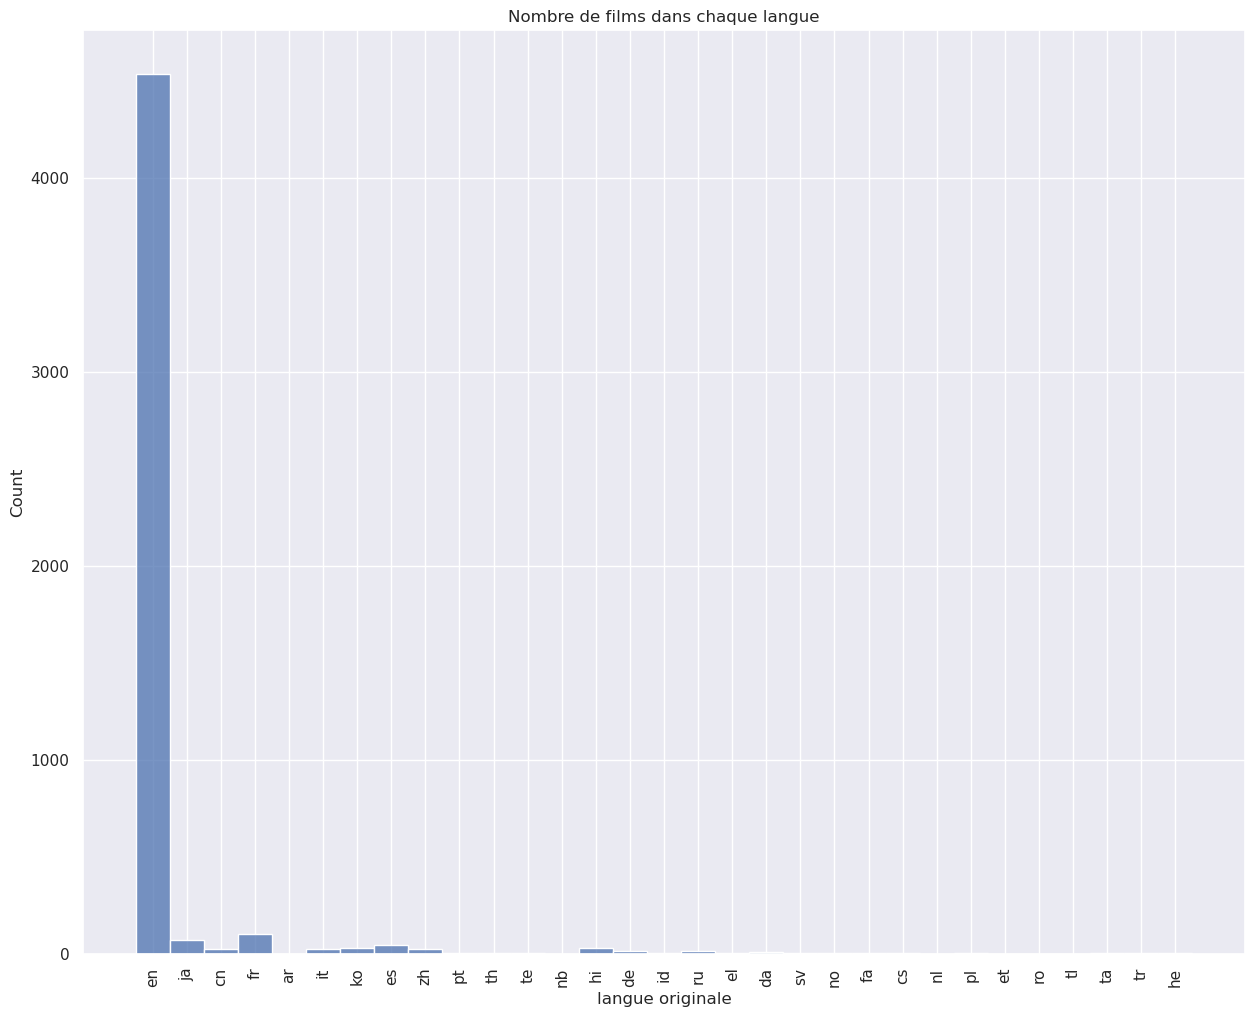

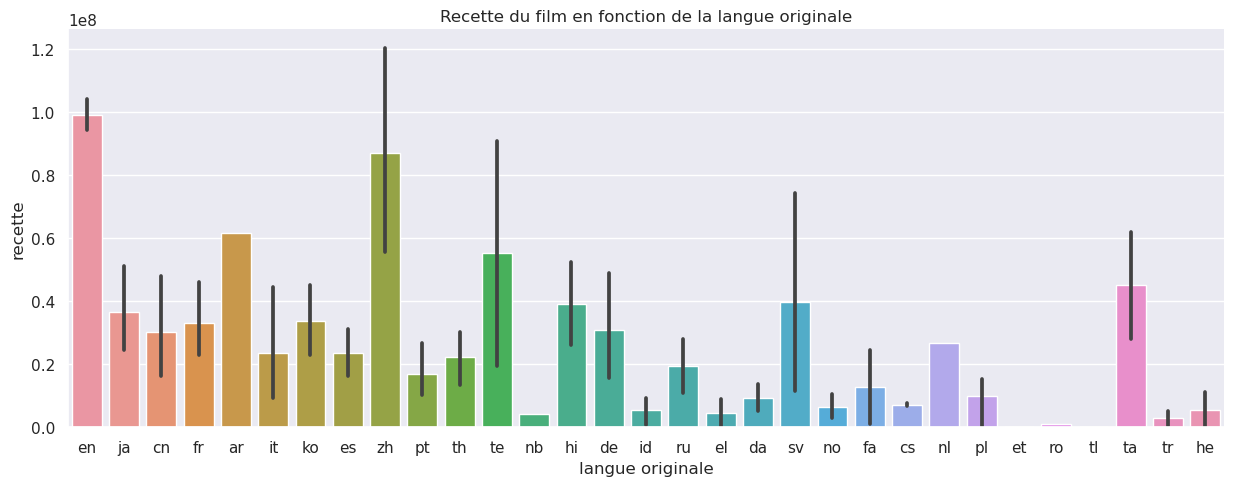

In [201]:
#Nombre de films dans chaque langue
plt.figure(figsize=(15,12)) 
sns.histplot(movies_df['original_language'])
plt.xticks(rotation=90)
plt.xlabel('langue originale')
plt.title('Nombre de films dans chaque langue')

#Recette en fonction de la langue originale
sns.catplot(x='original_language',y='revenue',data=movies_df, kind = 'bar', aspect = 2.5)
plt.xlabel('langue originale')
plt.ylabel('recette')
plt.title('Recette du film en fonction de la langue originale')


##### On constate que ce sont les films en anglais qui génèrent les plus grands revenus. Il y a d'ailleurs beaucoup plus de films en anglais qui sont produits que dans les autres langues. C'est une des langues les plus parlées au monde ce qui explique la popularité de tels films. 
##### Supprimons les films en anglais de la base de données pour pouvoir nous concentrer sur les autres langues : 

Text(0.5, 1.0, 'Recette du film en fonction de la langue originale')

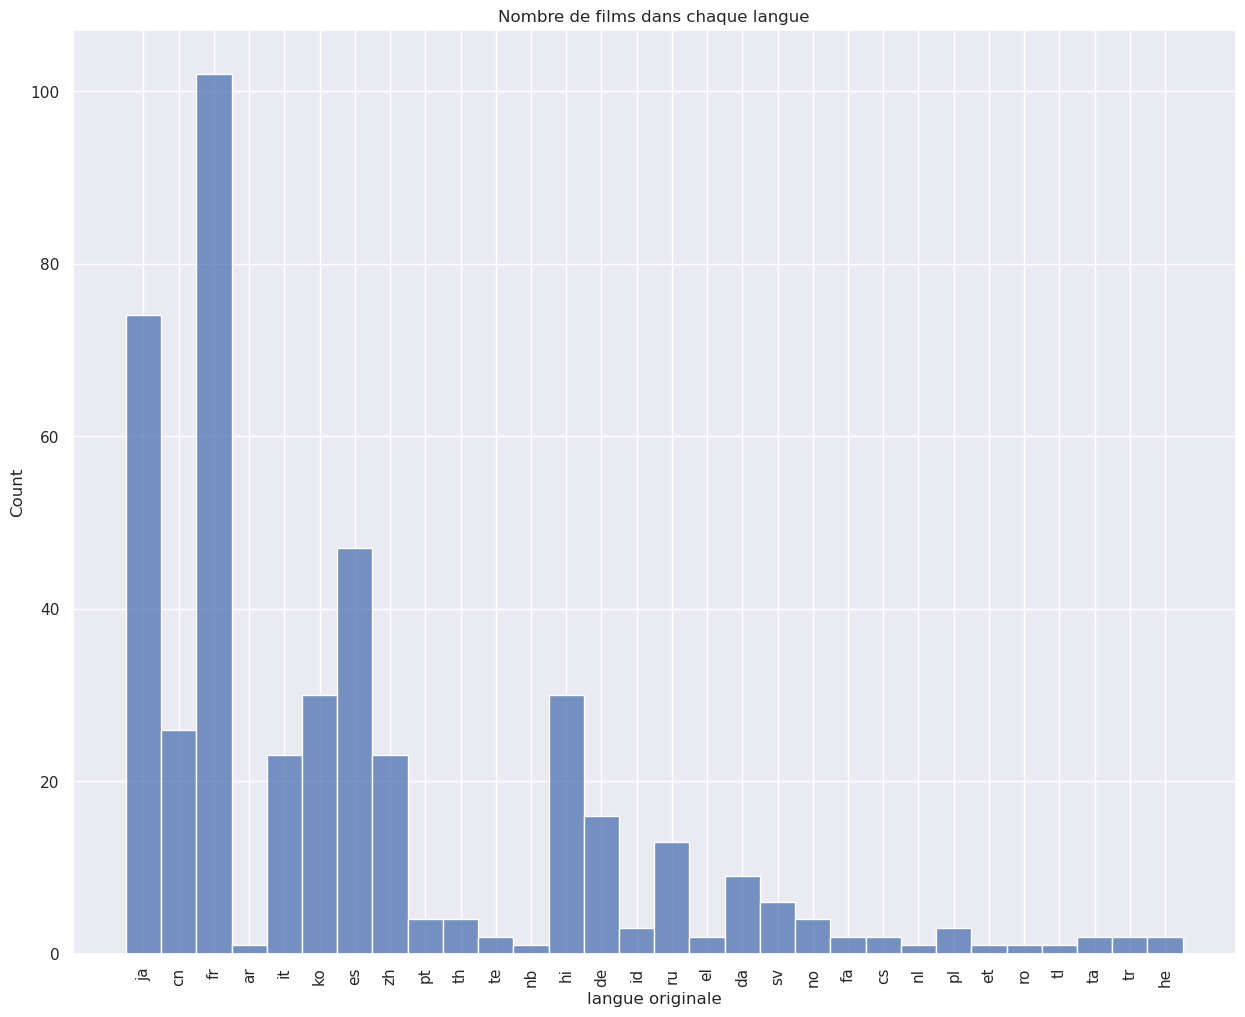

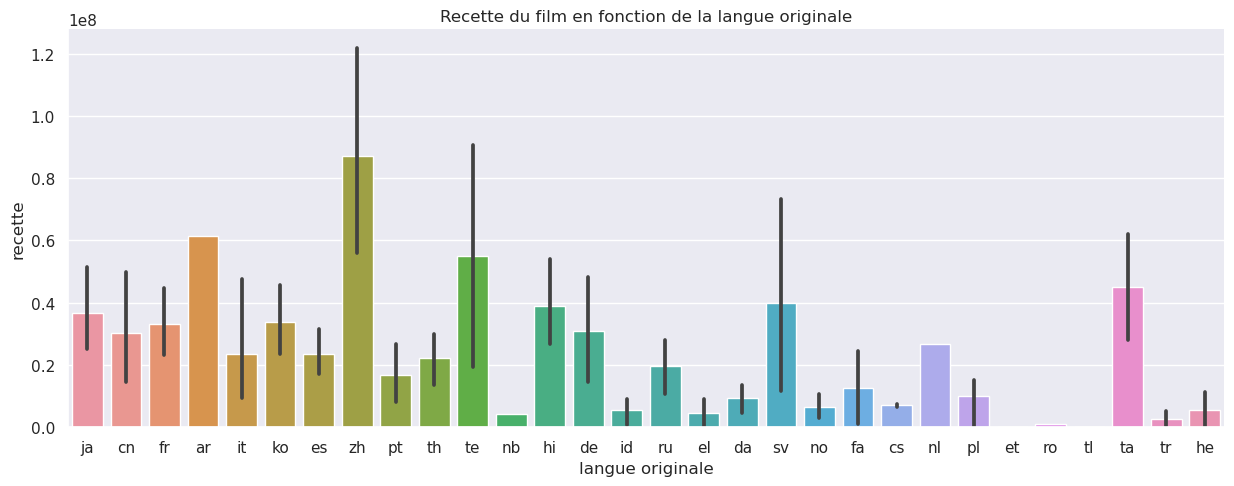

In [200]:
#On enlève les films en anglais
movies_df2 = movies_df.copy()
indexNames = movies_df2[movies_df2['original_language'] == 'en' ].index
movies_df2.drop(indexNames , inplace=True)

plt.figure(figsize=(15,12)) 
sns.histplot(movies_df2['original_language'])
plt.xticks(rotation=90)
plt.xlabel('langue originale')
plt.title('Nombre de films dans chaque langue')

sns.catplot(x='original_language',y='revenue',data=movies_df2, kind = 'bar', aspect = 2.5)
plt.xlabel('langue originale')
plt.ylabel('recette')
plt.title('Recette du film en fonction de la langue originale')


##### Les films en français et en japonais sont les plus nombreux. Ces deux pays ont effectivement une vieille tradition cinématographique, très reconnue. Toutefois, ce sont les films en chinois (zh) qui génèrent le plus de recette, suivi par l'arabe.

##### On s'intéresse au pays de production du film :

Text(0.5, 1.0, 'Recette du film en fonction du pays de production')

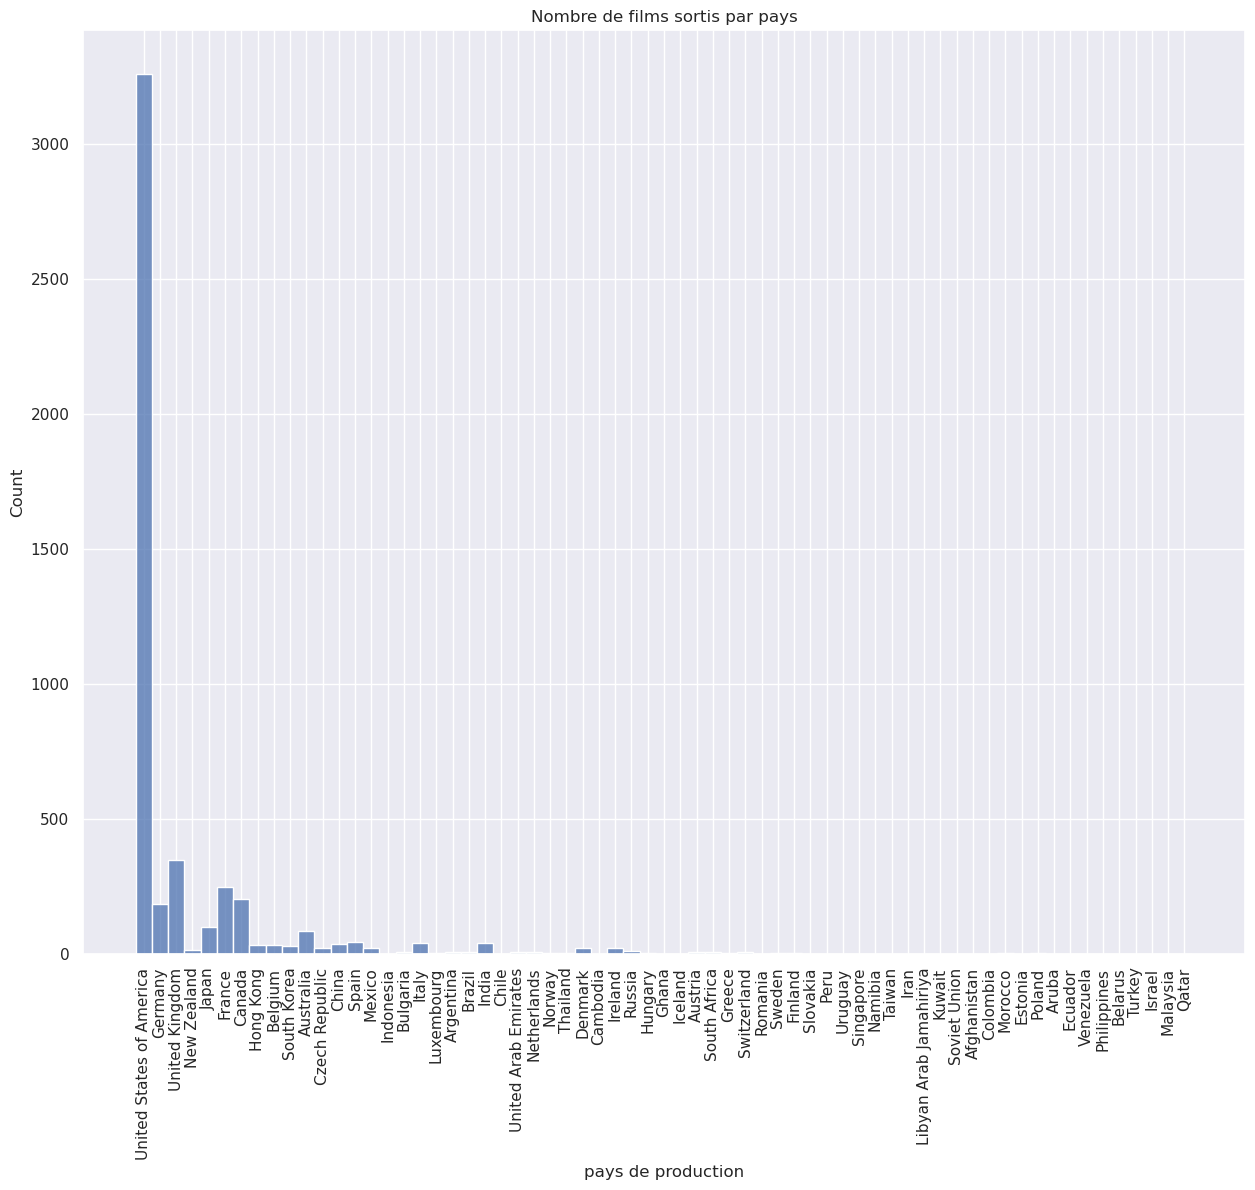

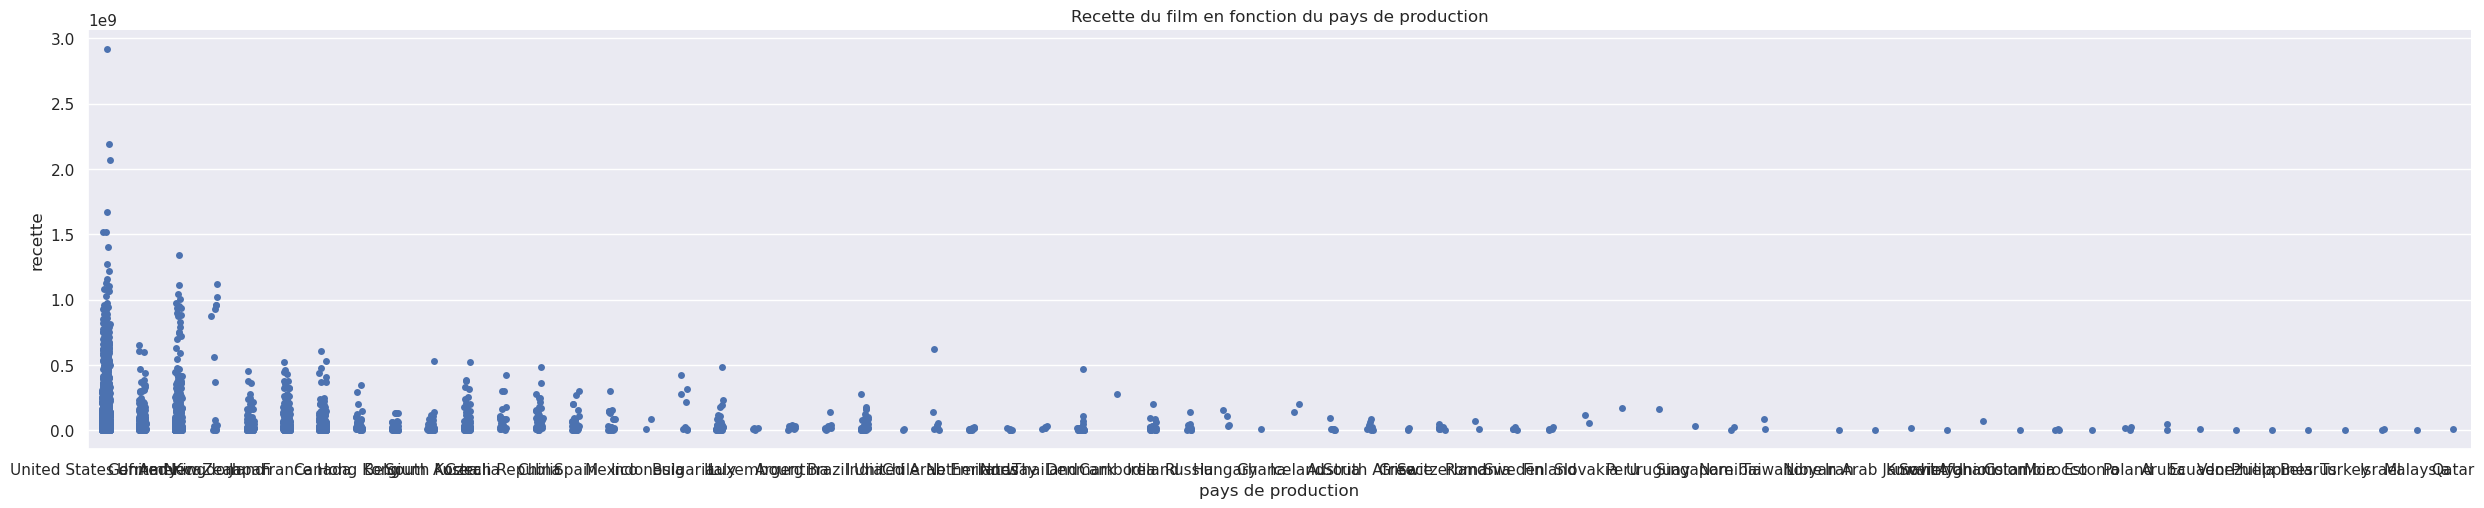

In [213]:
plt.figure(figsize=(15,12)) 
sns.histplot(tuple(movies_df['production_countries']))
plt.xticks(rotation=90)
plt.xlabel('pays de production')
plt.title('Nombre de films sortis par pays')

#Améliorer lisibilité
sns.catplot(x=tuple(movies_df['production_countries']),y='revenue',data=movies_df, aspect = 5)
plt.xlabel('pays de production')
plt.ylabel('recette')
plt.title('Recette du film en fonction du pays de production')


##### Ce sont bien les Etats-Unis qui dominent l'industrie du cinéma. En termes de recettes, les Etats-Unis et le Royaume-Uni dominent, suivis par l'Allemagne, la France, le Canada et l'Australie.

#### Recette et date de sortie

##### On s'intéresse à l'année de sortie :

Text(0.5, 1.0, "Recette du film en fonction de l'année de sortie")

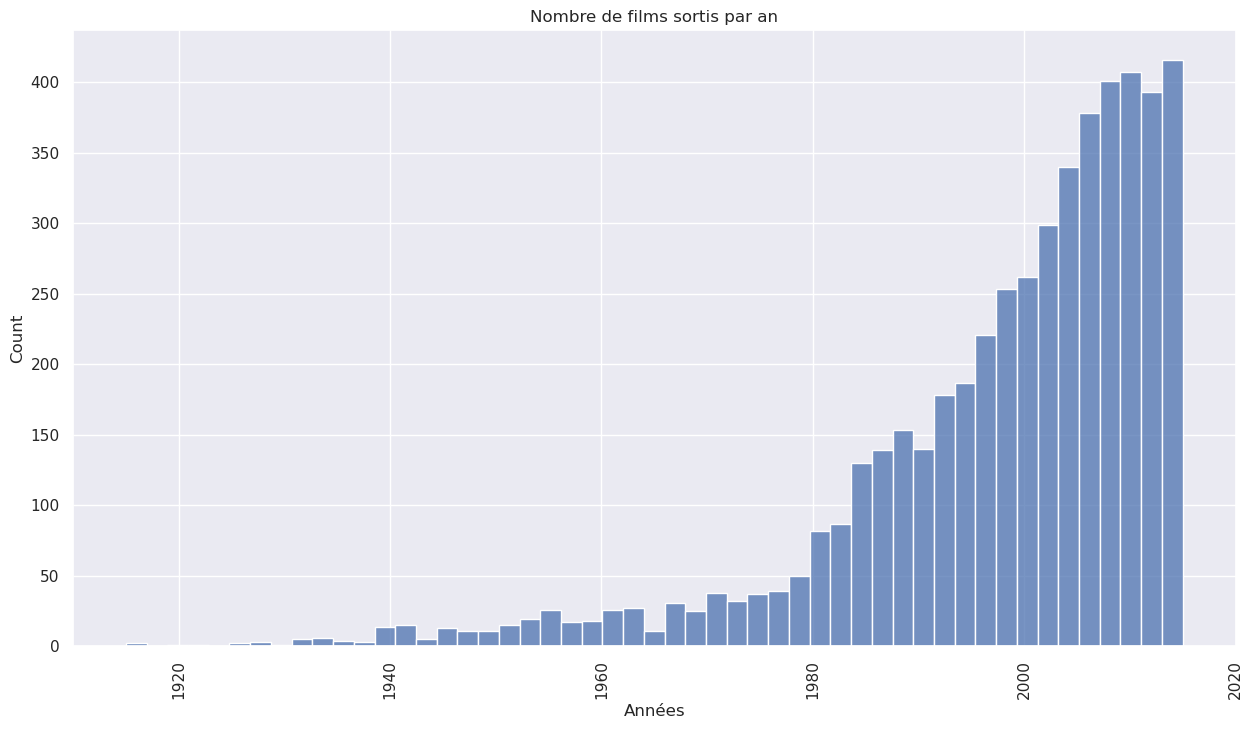

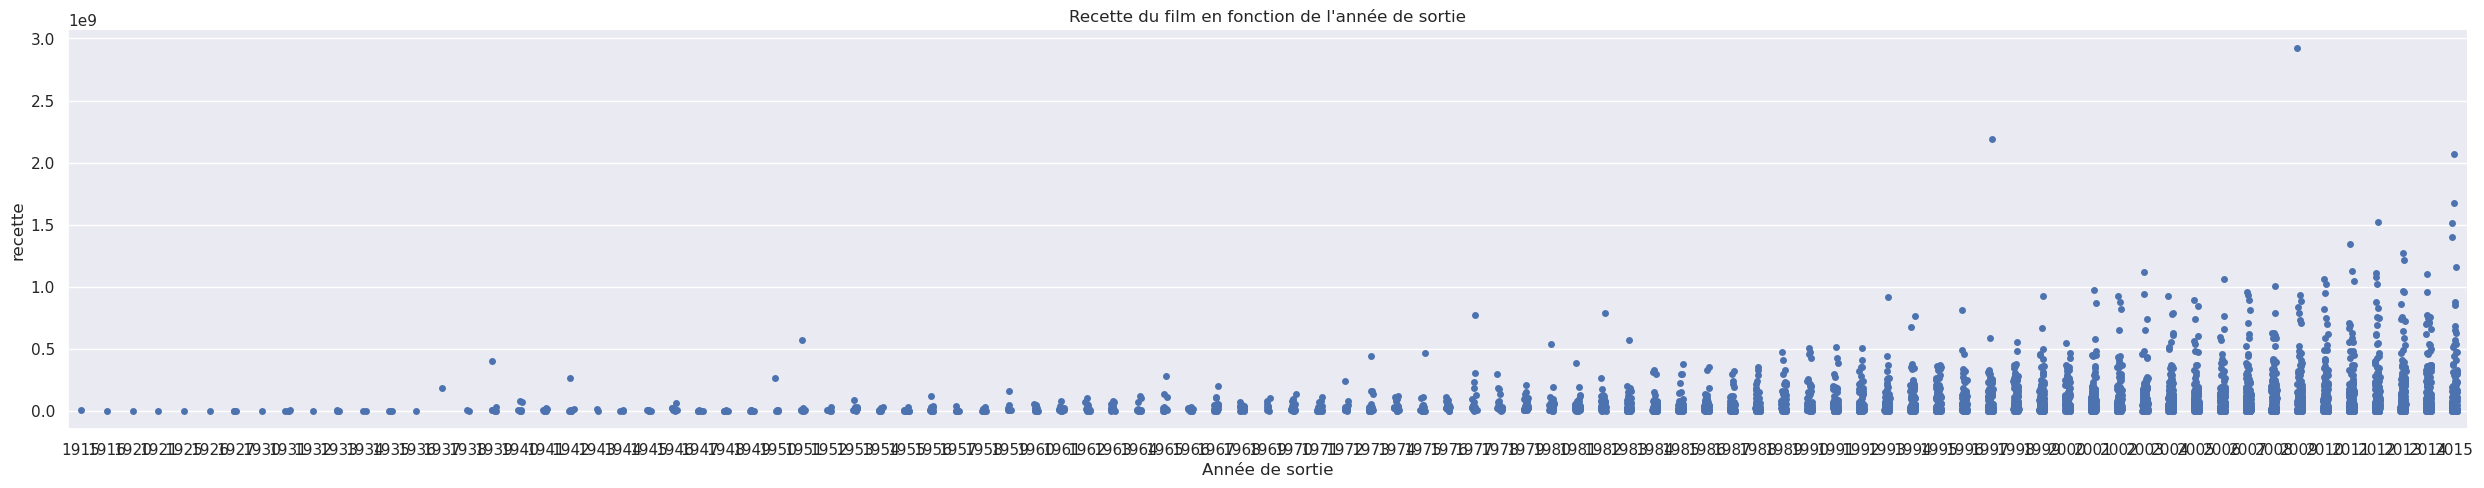

In [206]:
#Création d'une nouvelle variable : année de sortie
movies_df['date'] = pd.to_datetime(movies_df['release_date'],format='%Y-%m-%d')
movies_df['year'] = pd.DatetimeIndex(movies_df['date']).year

#Histogramme nombre de films sortis par an
sns.histplot(movies_df['year'])
plt.xticks(rotation=90)
plt.xlabel('Années')
plt.title('Nombre de films sortis par an')

#Recette en fonction des années
sns.catplot(x='year',y='revenue',data=movies_df, aspect = 5)
plt.xlabel('Année de sortie')
plt.ylabel('recette')
plt.title("Recette du film en fonction de l'année de sortie")


##### Le nombre de films réalisés depuis 1915 n'a fait que croitre, avec une augmentation très importante à partir des années 1980. En moyenne, cependant, on constate que les recettes n'ont pas augmenté aussi vite, bien qu'il existe chaque année des exceptions notables qui battent des records de revenu. On en conclut toutefois qu'un film sorti aujourd'hui fera certainement une recette plus importante qu'il y a 50 ans. 

##### On s'intéresse maintenant au mois de sortie : 

Text(0.5, 1.0, 'Recette du film en fonction du mois de sortie')

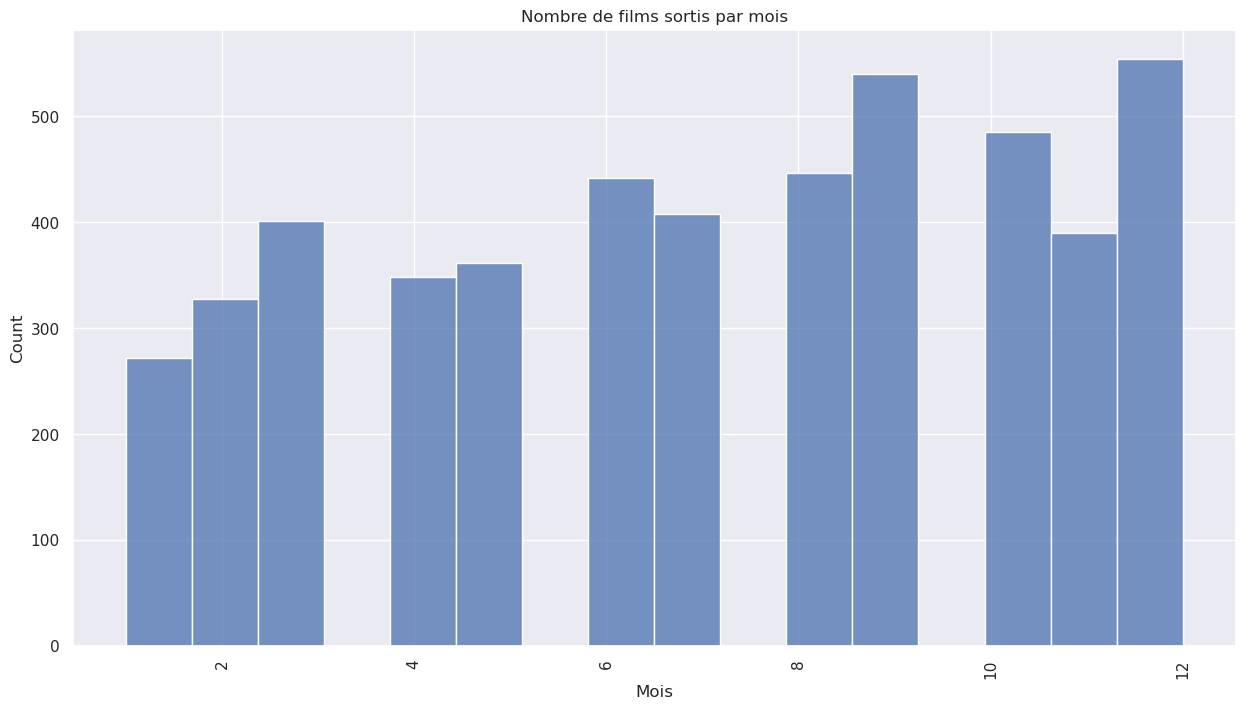

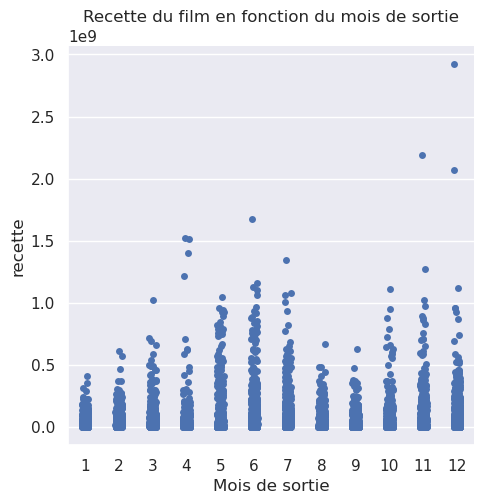

In [208]:
movies_df['date'] = pd.to_datetime(movies_df['release_date'],format='%Y-%m-%d')
movies_df['month'] = pd.DatetimeIndex(movies_df['date']).month

sns.histplot(movies_df['month'])
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.title('Nombre de films sortis par mois')

sns.catplot(x='month',y='revenue',data=movies_df)
plt.xlabel('Mois de sortie')
plt.ylabel('recette')
plt.title("Recette du film en fonction du mois de sortie")


##### Il y a plus de films qui sortent en fin d'année. On constate que ce sont les films sortis entre mai et juillet ou octobre et décembre qui ont les recettes les plus élevées. Janvier, au contraire, apparait comme un mois très peu prolifique dans le secteur du cinéma.

#### Genre et recette :

Text(0.5, 1.0, 'Recette du film en fonction du genre')

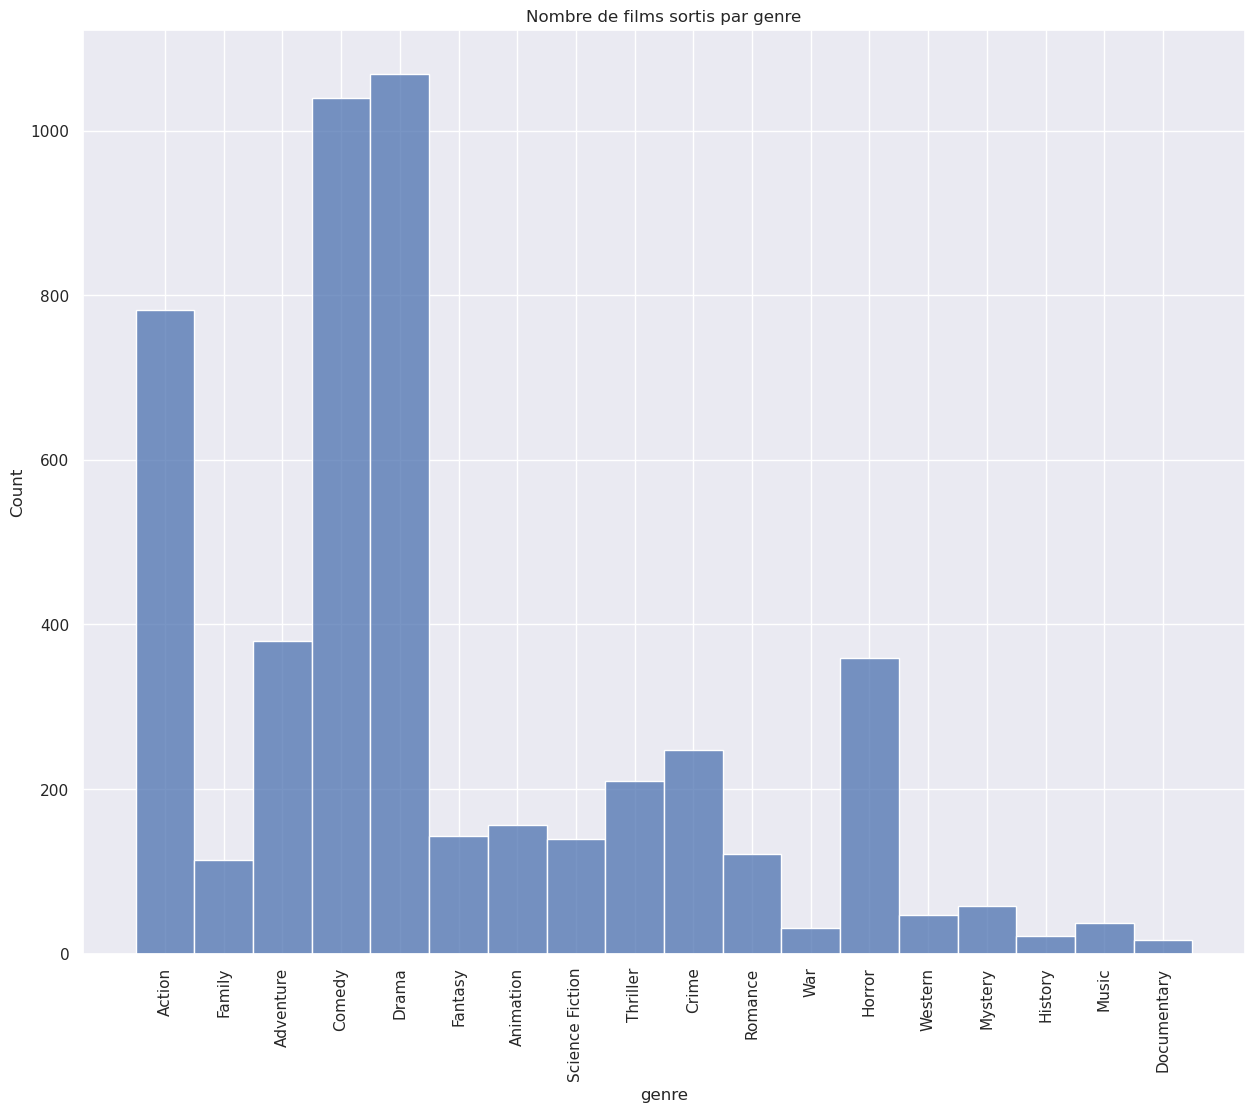

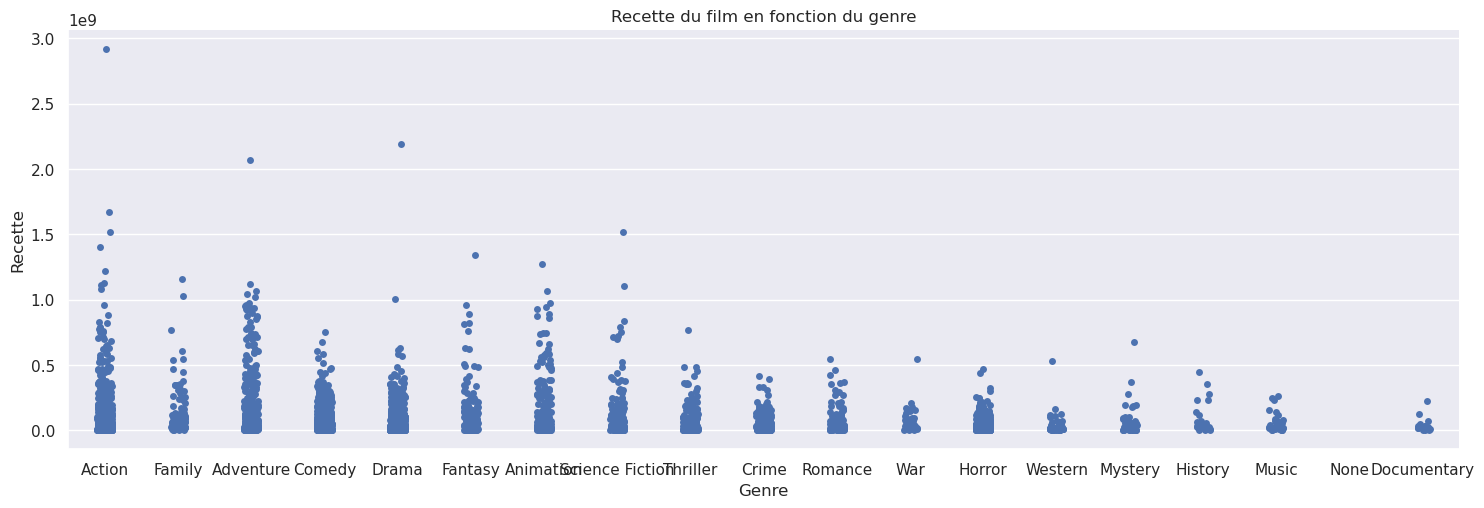

In [211]:
plt.figure(figsize=(15,12)) 
sns.histplot(tuple(movies_df['genres']))
plt.xticks(rotation=90)
plt.xlabel('genre')
plt.title('Nombre de films sortis par genre')

sns.catplot(x=tuple(movies_df['genres']),y='revenue',data=movies_df, aspect = 3)
plt.xlabel('Genre')
plt.ylabel('Recette')
plt.title("Recette du film en fonction du genre")


##### Les drames, les comédies, et les films d'action sont les genres les plus courants au cinéma. Les films d'action, les films d'aventure, les films fantastiques, de science-fiction et les animations apparaissent comme les genres générant les plus grosses recettes.

##### Un genre possède souvent un lexique particulier. Y a-t-il des mots clés dans le résumé d'un film qui assurent que celui-ci aura du succès ?
##### On réalise un nuage de mots pour voir quels sont les mots qui reviennent le plus souvent dans les taglines des films qui ont une recette supérieure au 3ème quartile. 

(1244, 17)


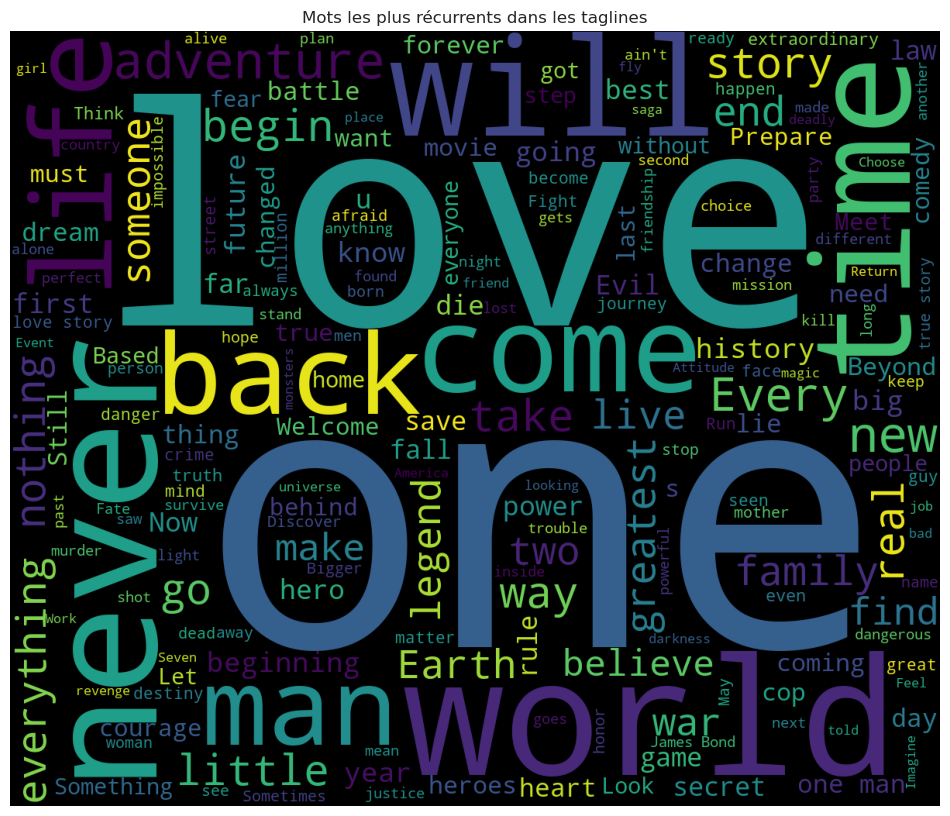

In [215]:
#on sélectionne les films dont la recette est supérieure au 3ème quartile
movies_df_bigrev = movies_df.query('revenue >= 1.039066e+08')
print(movies_df_bigrev.shape)

#On réalise le nuage de mots
plt.figure(figsize = (12, 12))
text = ' '.join(movies_df_bigrev['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Mots les plus récurrents dans les taglines')
plt.axis("off")
plt.show()

##### Des mots qu'on pourrait qualifier de "clichés" sortent du lot. Le mot "love" est extrêmement présent. On peut alors penser qu'un film ayant une dimension romantique a des chances d'avoir du succès. Les autres mots nous laissent également penser que les films évoquant la guerre, la famille, l'aventure, l'amitié, le destin... auront des recettes importantes. On peut remarquer que le nuage de mots affiche "James Bond", grande franchise à succès.